In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns;

In [4]:
folder = input("Please give the folder path containing your hpxmp and openmp data:")
bench_name = input("Enter your bench name:")
merged_hpxmp = open(folder+"/merged_hpxmp.csv","w+")
for line in open(folder+"/hpxmp_"+bench_name+"_2th_run.csv"):
    merged_hpxmp.write(line)
for num in range(3,12):
    f = open(folder+"/hpxmp_"+bench_name+"_"+str(num)+"th_run.csv")
    f.__next__() #skip the header
    for line in f:
        merged_hpxmp.write(line)
    f.close()
merged_hpxmp.close()

merged_openmp = open(folder+"/merged_openmp.csv","w+")    
for line in open(folder+"/openmp_"+bench_name+"_2th_run.csv"):
    merged_openmp.write(line)
for num in range(3,12):
    f = open(folder+"/openmp_"+bench_name+"_"+str(num)+"th_run.csv")
    f.__next__() #skip the header
    for line in f:
        merged_openmp.write(line)
    f.close()
merged_openmp.close()
                 

Please give the folder path containing your hpxmp and openmp data:../result_dense_vector_marv_noht_201811191604
Enter your bench name:dense_vector


In [5]:
hpxmp = pd.read_csv(folder+"/merged_hpxmp.csv")
openmp = pd.read_csv(folder+"/merged_openmp.csv")
hpxmp.head()

,mfc/s,num_threads,vector_size
0,3.33333,1,200000
1,3.33333,2,200000
2,3.33333,3,200000
3,2.85714,4,200000
4,2.22222,5,200000


In [6]:
hpxmp_1_2 = hpxmp.groupby(['num_threads','vector_size']).mean()
hpxmp_1_2.head()
openmp_1_2 = openmp.groupby(['num_threads','vector_size']).mean()

In [7]:
hpxmp_1_2 = hpxmp_1_2.reset_index()
hpxmp_1_2.head()
openmp_1_2 = openmp_1_2.reset_index()

In [8]:
pivot_table_hpxmp = hpxmp_1_2.pivot('vector_size','num_threads','mfc/s')

In [9]:
pivot_table_openmp = openmp_1_2.pivot('vector_size','num_threads','mfc/s')

how many distinct thread do you have?16
how many vector size group do you have?50


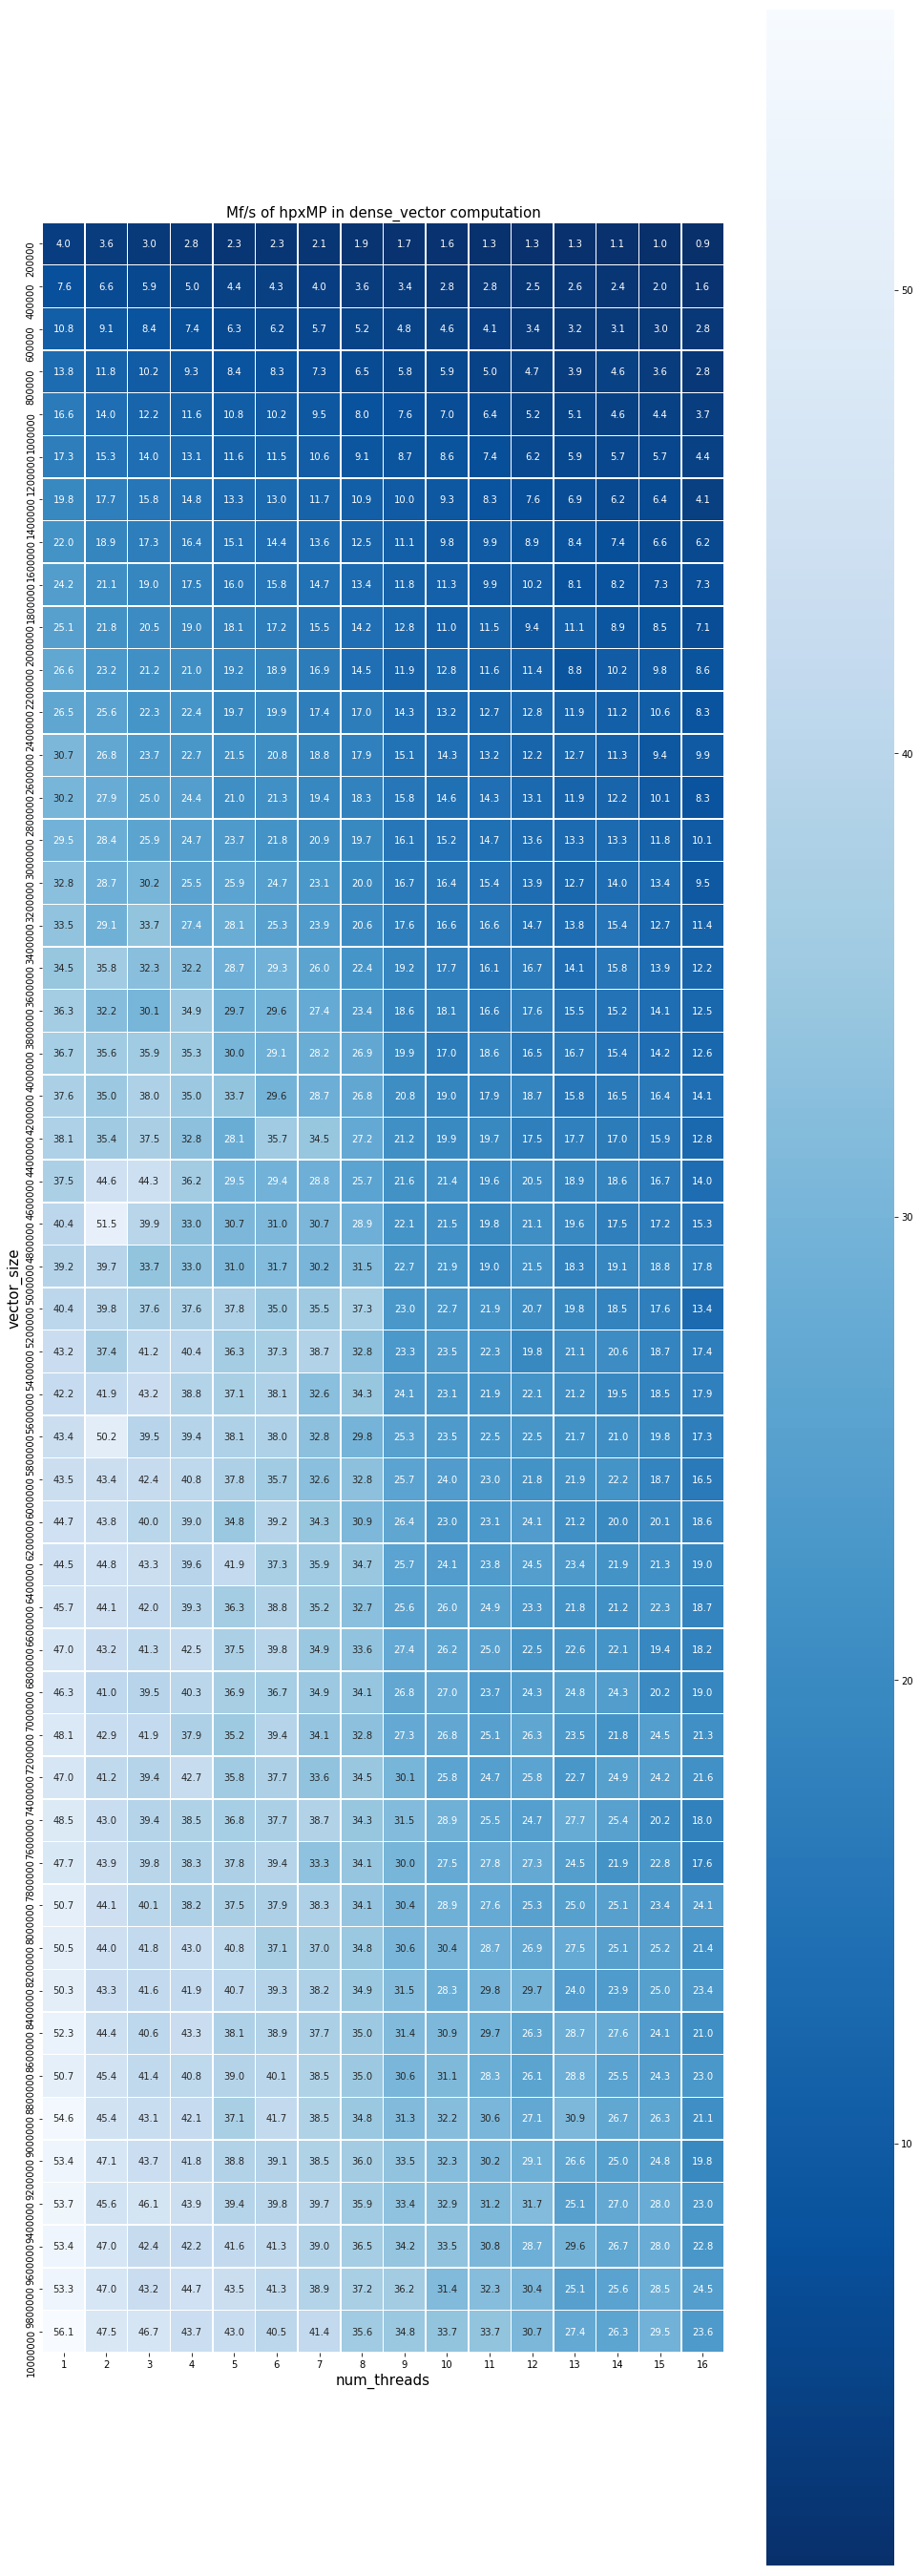

In [10]:
num_thr=int(input("how many distinct thread do you have?"))
num_vsz=int(input("how many vector size group do you have?"))
plt.figure(figsize=(num_thr,num_vsz))
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('Mf/s of hpxMP in '+bench_name+' computation',size = 15)
sns_plot_hpxmp = sns.heatmap(pivot_table_hpxmp,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')


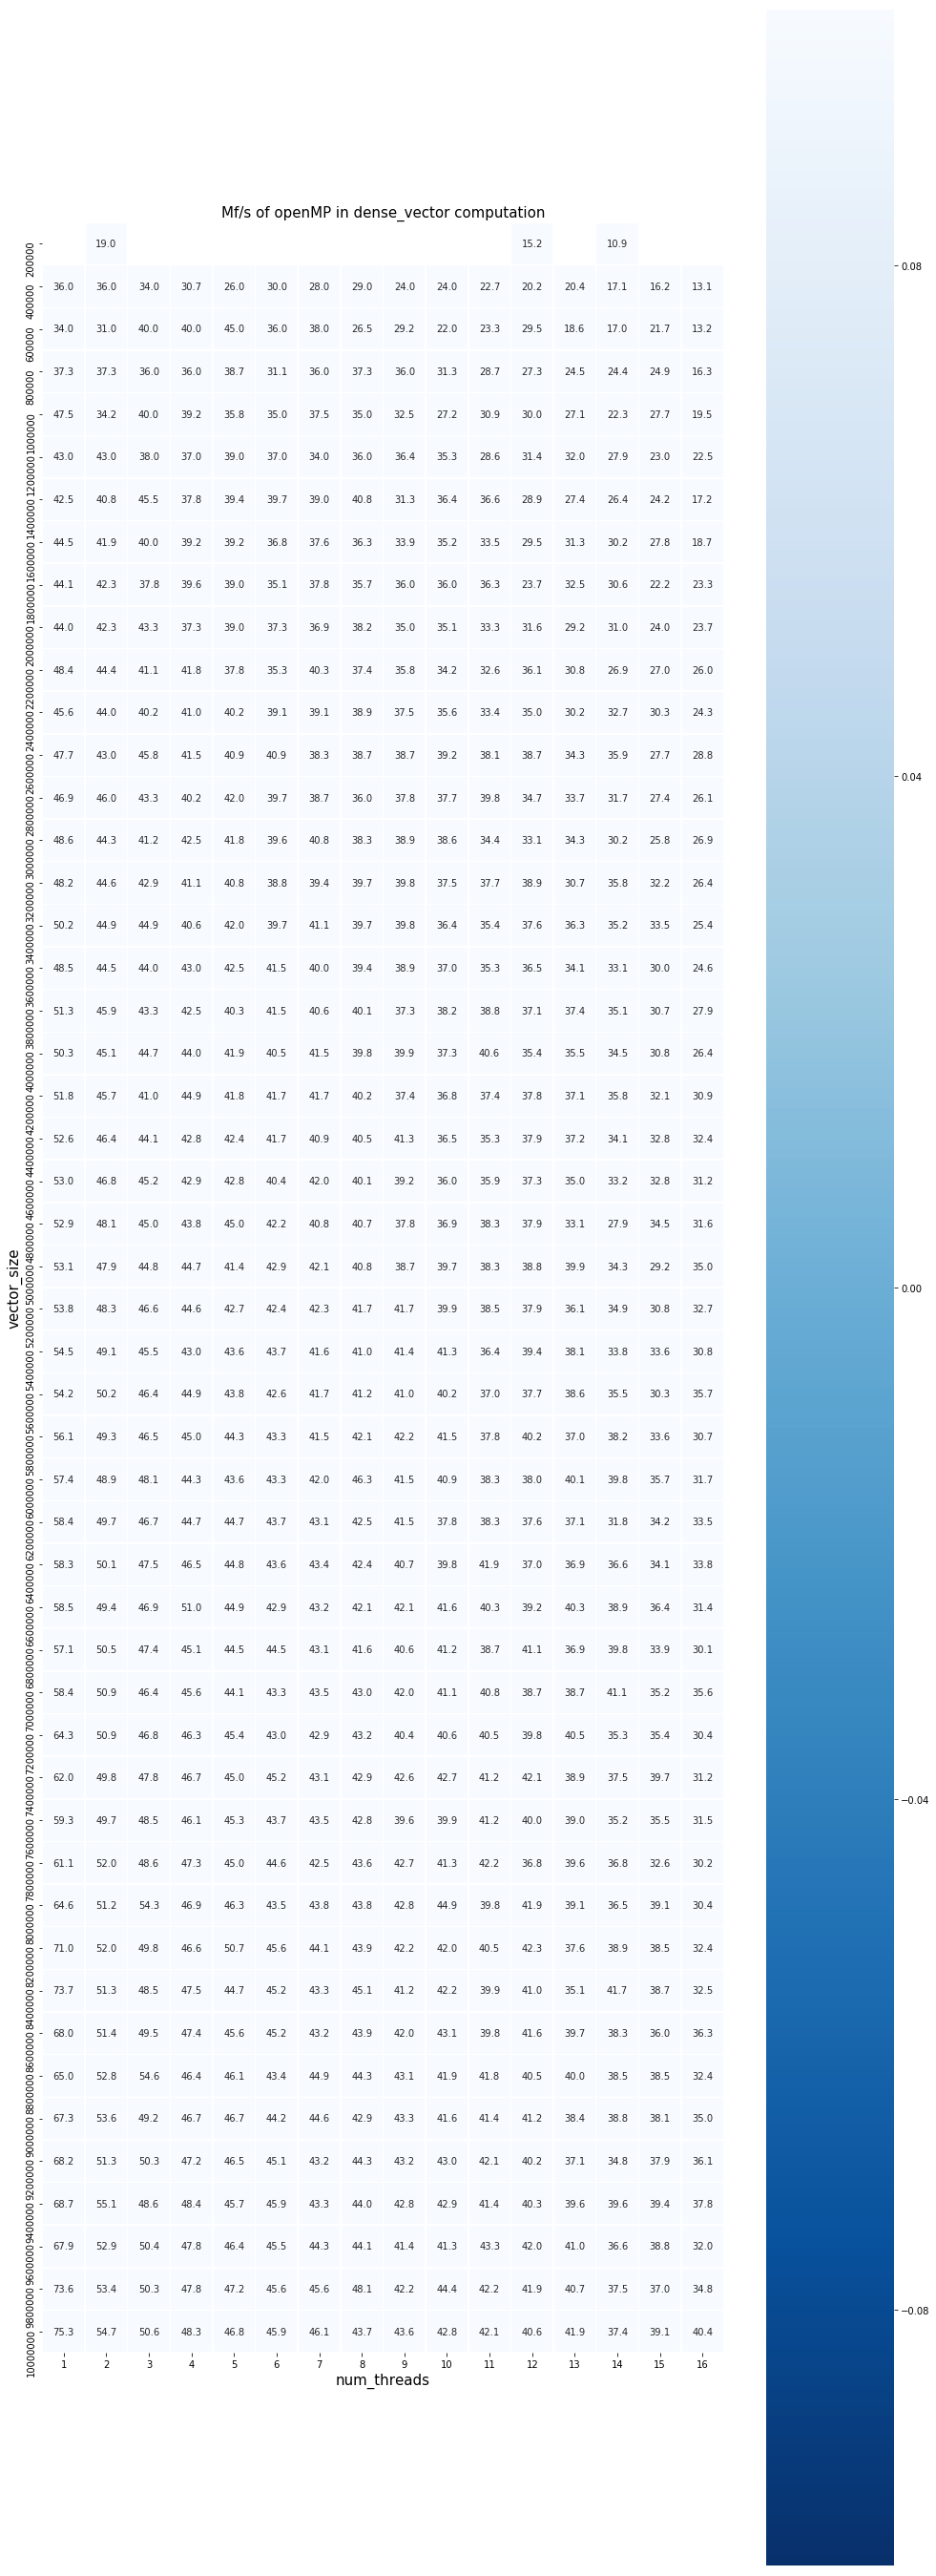

In [11]:
plt.figure(figsize=(num_thr,num_vsz))
pivot_table_openmp = openmp_1_2.pivot('vector_size','num_threads','mfc/s')
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('Mf/s of openMP in '+bench_name+' computation',size = 15)
sns_plot_openmp = sns.heatmap(pivot_table_openmp,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')

In [12]:
figure_hpxmp = sns_plot_hpxmp.get_figure()
figure_hpxmp.savefig(folder+"/hpxmp")
figure_openmp = sns_plot_openmp.get_figure()
figure_openmp.savefig(folder+"/openmp")

In [13]:
pivot_table_diff = pivot_table_hpxmp/pivot_table_openmp

In [14]:
pivot_table_diff.head(16)

num_threads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
vector_size,,,,,,,,,,,,,,,,
200000,0.000000,0.189474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083998,0.000000,0.101946,0.000000,0.000000
400000,0.211111,0.183598,0.174370,0.164079,0.170940,0.144074,0.142424,0.122466,0.141803,0.116349,0.125036,0.125755,0.128657,0.139844,0.126029,0.124622
600000,0.317647,0.294931,0.208929,0.185417,0.140741,0.171044,0.151276,0.195804,0.163518,0.207855,0.176533,0.114370,0.171532,0.179731,0.138429,0.210373
800000,0.368367,0.315051,0.283510,0.259259,0.217085,0.266481,0.202953,0.174126,0.162352,0.189806,0.173104,0.172860,0.158608,0.189548,0.144155,0.170917
1000000,0.349875,0.411150,0.305556,0.295035,0.300352,0.290837,0.252929,0.229533,0.235278,0.257939,0.208497,0.172709,0.189446,0.208677,0.159334,0.190988
1200000,0.401994,0.354928,0.369298,0.353152,0.296504,0.311875,0.310627,0.251709,0.237773,0.244172,0.257110,0.198938,0.183603,0.205582,0.248977,0.196006
1400000,0.465070,0.432653,0.347864,0.390947,0.337458,0.328343,0.299647,0.266248,0.320023,0.255415,0.226378,0.260832,0.252517,0.232879,0.262078,0.241055
1600000,0.494011,0.451168,0.432223,0.418058,0.385901,0.389987,0.362546,0.343921,0.327183,0.277584,0.295551,0.301299,0.267337,0.245555,0.238928,0.332312
1800000,0.549077,0.497636,0.503607,0.442148,0.409790,0.451437,0.389122,0.374457,0.327083,0.314454,0.272720,0.431339,0.250690,0.267664,0.330837,0.312922


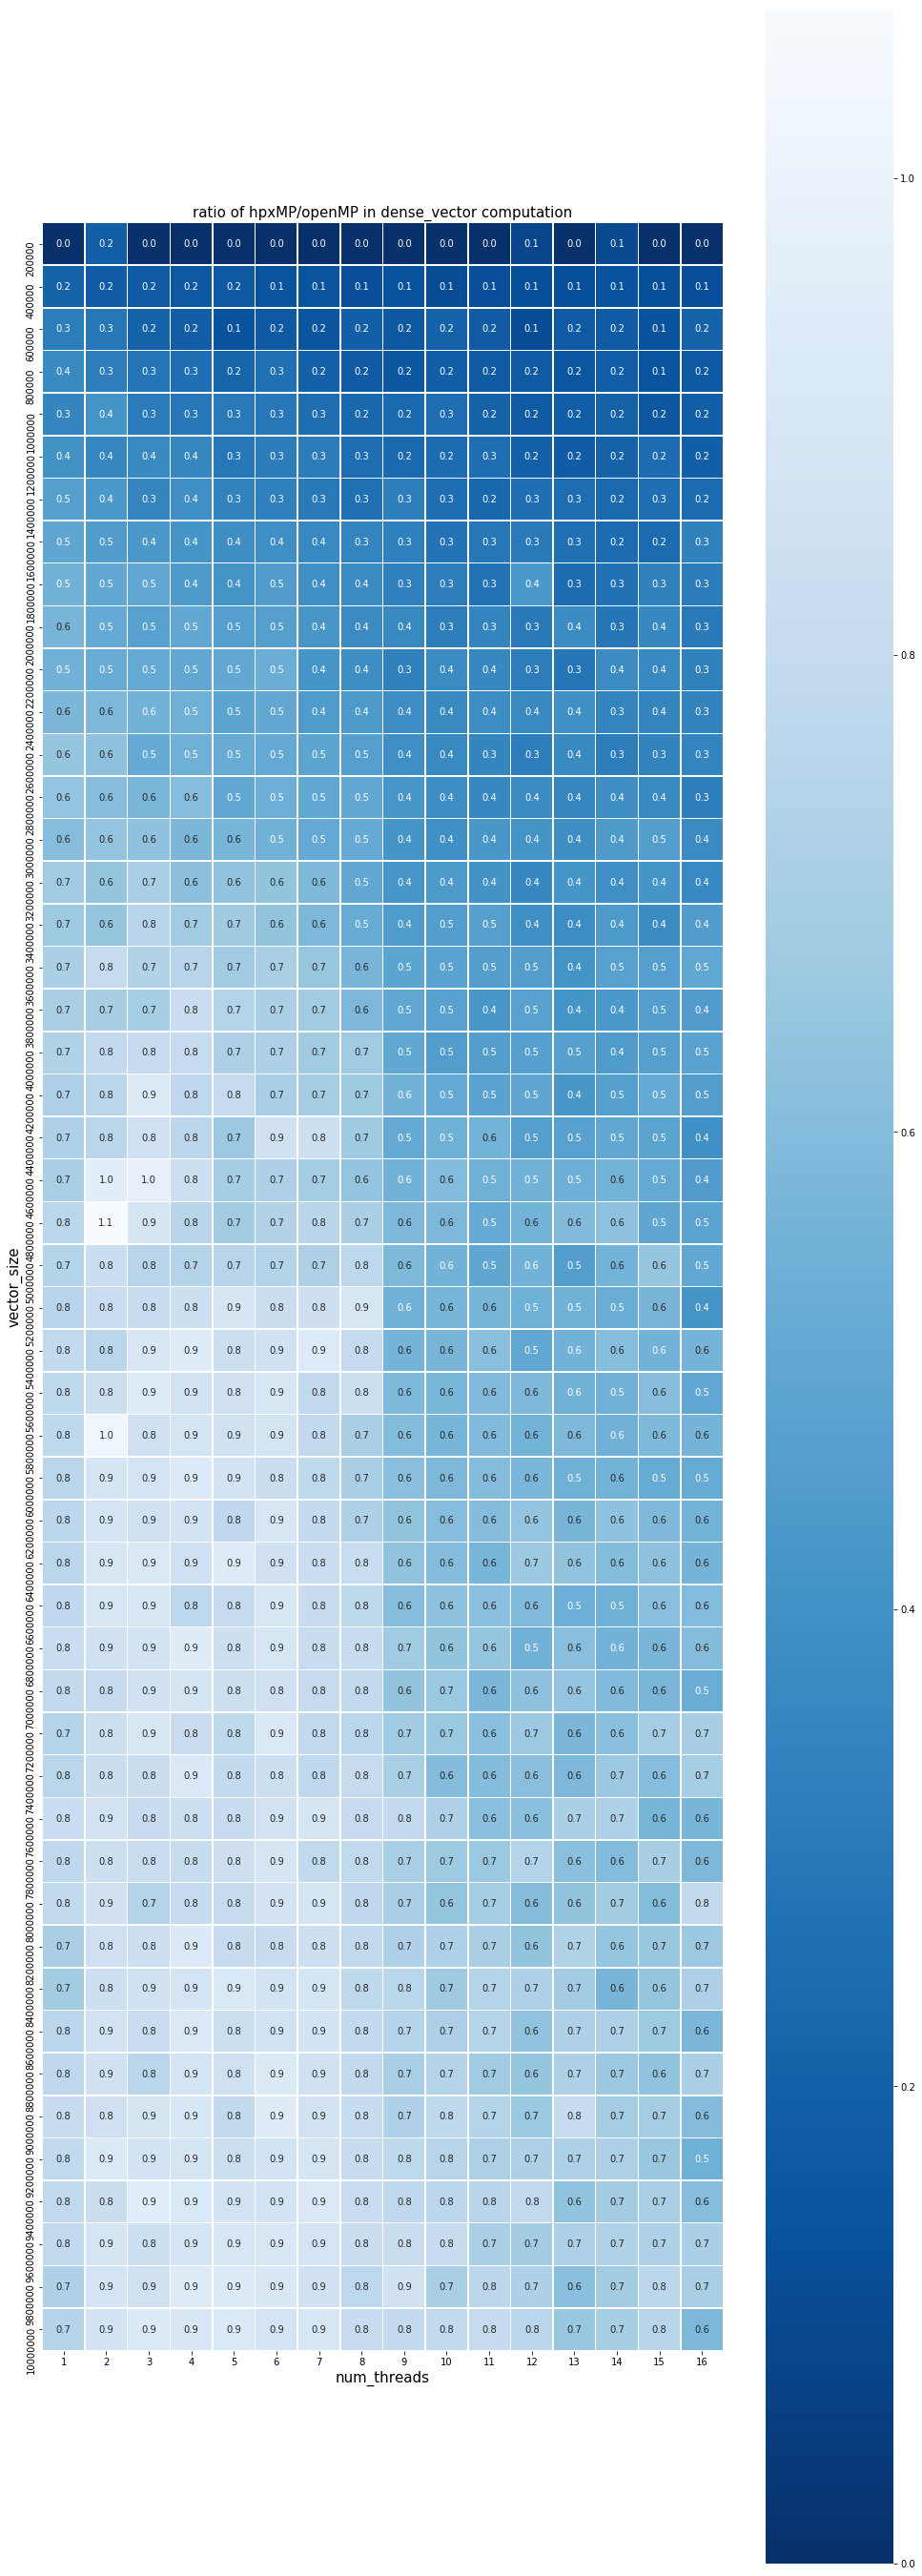

In [15]:
plt.figure(figsize=(num_thr,num_vsz))
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('ratio of hpxMP/openMP in '+bench_name+' computation',size = 15)
sns_plot_diff = sns.heatmap(pivot_table_diff,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')

In [16]:
figure_diff = sns_plot_diff.get_figure()
figure_diff.savefig(folder+"/hpxmp_openmp_diff")